### https://indico.global/category/301/attachments/16304/26266/Statistics_Fitting_II.pdf

### https://www.colorado.edu/amath/sites/default/files/attached-files/wilks_theorem.pdf

In [213]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import erfinv, erf
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy import stats
from scipy.special import gammaincinv
from scipy.special import factorial #as fact

In [215]:
factorial(1)

1.0

In [217]:
np.random.seed(2147483648)


N1 = 250
N2 = 50
mu_a1, sigma_a1 = 90, 20
mu_a2, sigma_a2 = 150, 20
X1_N1_a = np.random.normal(mu_a1, sigma_a1, N1)
X2_N1_a = np.random.normal(mu_a2, sigma_a2, N2)
X01_a = np.concatenate([X1_N1_a, X2_N1_a])



N1 = 50
N2 = 250
mu_a1, sigma_a1 = 90, 20
mu_a2, sigma_a2 = 160, 20
X1_N1_a = np.random.normal(mu_a1, sigma_a1, N1)
X2_N1_a = np.random.normal(mu_a2, sigma_a2, N2)
X01_b = np.concatenate([X1_N1_a, X2_N1_a])


counts_X1, bins_X1 = np.histogram(X01_a, bins = 15,  density=False)
counts_X2, bins_X2 = np.histogram(X01_b, bins = 15,  density=False)

counts_X0, bin_X0 = np.histogram(X01_a, bins = 11,  density=False)
counts_X1, bin_X1 = np.histogram(X01_b, bins = 11,  density=False)
bins_X0 = (bin_X0[1:] + bin_X0[:-1]) / 2
bins_X1 = (bin_X1[1:] + bin_X1[:-1]) / 2

In [219]:
(bins_X0)**counts_X0

array([1.22910267e+003, 7.08543836e+011, 8.19504487e+064, 1.35891650e+119,
       4.99290560e+125, 3.25610531e+115, 8.87155674e+049, 8.81598306e+031,
       2.67007182e+030, 1.34816133e+022, 9.87299029e+017])

In [221]:
counts_X0

array([ 2,  7, 36, 63, 64, 57, 24, 15, 14, 10,  8], dtype=int64)

In [223]:
f0 = ((bins_X0)**counts_X0 * np.exp(-bins_X0))/factorial(counts_X0)
f1 = ((bins_X1)**counts_X1 * np.exp(-bins_X1))/factorial(counts_X1)
ln_0 = np.sum(np.log(f0)) 
ln_1 = np.sum(np.log(f1)) 

lnrt2 = 2 * (ln_1 - ln_0)

lnrt2

-356.3432915954693

In [227]:
N1 = 50
N2 = 250
mu_a1, sigma_a1 = 90, 20
mu_a2, sigma_a2 = 160, 20
X1_N1_a = np.random.normal(mu_a1, sigma_a1, N1)

alpha_range = np.linspace(60, 200.0, 100)
parameter = [(alpha_0, mu) for mu in alpha_range]   # mu_0 = 1.98, sig_0 = sig_

In [229]:
len(parameter[0])

2

In [237]:
def wilk_theorem_poission(X0, X1):
    
    counts_X0, bin_X0 = np.histogram(X0, bins = 15,  density=False)
    counts_X1, bin_X1 = np.histogram(X1, bins = 15,  density=False)

    bins_X0 = (bin_X0[1:] + bin_X0[:-1]) / 2.
    bins_X1 = (bin_X1[1:] + bin_X1[:-1]) / 2.

    #print("Count X0: ", counts_X0)
    #print("Bins X0: ", bins_X0)
    #print("Count X1: ", counts_X1)
    #print("Bins X1: ", bins_X1)

    f0 = ((bins_X0)**counts_X0 * np.exp(-bins_X0))/factorial(counts_X0)
    f1 = ((bins_X1)**counts_X1 * np.exp(-bins_X1))/factorial(counts_X1)
    #print("f1/f0: ", f1/f0)
    lnrt2 = 2 * np.sum(np.log(f1/f0)) 
    #ln_1 = np.sum(np.log(f1)) 

    #lnrt2 = 2 * (ln_1 - ln_0)
    return lnrt2

In [243]:
for par in parameter:
    test = wilk_theorem_poission(X01_a, X01_b)
    print(test)

-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882273862
-602.6880882

In [241]:
print(np.mean(counts_X2))

20.0


In [205]:
alpha_0 = 90
alpha_1 = 150
X = counts_X2
parms = alpha_0, alpha_1
#lrt2 = wilk_theorem_poission(pX)
#lrt2

In [207]:
# 95% CL 

dof_wilk = 1

alpha_95 = 5 # in percent
k = dof_wilk
x = alpha_95/100
isf_95 = 2 * gammaincinv(k/2, 1-x)

print("Degree of freedom: ", dof_wilk)
print(r"The value of chi-square at alpha = 95 % : ", isf_95)
print(r"The respective reduced chi-square value: ", isf_95/dof_wilk)


Degree of freedom:  1
The value of chi-square at alpha = 95 % :  3.841458820694124
The respective reduced chi-square value:  3.841458820694124


In [87]:
# Make this more efficient by holding value only if bigger than prev value
log_likelihood_ratio = []
params = []
p_val_wilk = []
dof_wilk = 1




N1 = 50
N2 = 250
mu_a1, sigma_a1 = 90, 20
mu_a2, sigma_a2 = 160, 20
X1_N1_a = np.random.normal(mu_a1, sigma_a1, N1)

alpha_range = np.linspace(60, 200.0, 100)
parameter = [(np.concatenate([X1_N1_a, np.random.normal(mu, sigma_a2, N2)])) for mu in alpha_range]   # mu_0 = 1.98, sig_0 = sig_



for par in parameter:
    lrt2 = wilk_theorem_poission(X01_a, par)
    log_likelihood_ratio.append(lrt2)
    p_value = 1 - stats.chi2.cdf(lrt2 , dof_wilk)
    p_value_percent = p_value * 100
    p_val_wilk.append(p_value)

p_val_wilk = np.array(p_val_wilk)

idx = np.argwhere(np.diff(np.sign(log_likelihood_ratio - isf_95))).flatten()


#print("The -2 log likelihood ratio above zero: ", log_likelihood_ratio[log_likelihood_ratio > 0])

#print("The -2 log likelihood ratio above the critical values: ", log_likelihood_ratio[log_likelihood_ratio > isf_70])

Z = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Z = np.array(Z)
p_val_Z = 1. - stats.norm.cdf(Z)
#print(p_val_Z)


print("The index where -2 log likelihood ratio above the critical values: ", idx)
print("The values of the parameters above at intersection: ", alpha_range[idx])

#print(mu_)

Count X0:  [ 1  3  6 29 42 50 53 40 16 18 10 11  8  6  7]
Bins X0:  [ 33.15875425  43.60768913  54.05662401  64.50555888  74.95449376
  85.40342864  95.85236352 106.3012984  116.75023328 127.19916816
 137.64810304 148.09703792 158.54597279 168.99490767 179.44384255]
Count X1:  [ 1  0  3  5  8 24 41 40 63 40 39 14  8 10  4]
Bins X1:  [-14.0610699   -4.22884211   5.60338568  15.43561348  25.26784127
  35.10006906  44.93229685  54.76452464  64.59675243  74.42898022
  84.26120801  94.0934358  103.92566359 113.75789139 123.59011918]
f1/f0:  [-1.36373261e+20  4.31125370e+16  9.34142890e+14  4.39001939e+03
  3.97960027e+00  1.12322477e+03  8.92797409e+04  7.25381683e+10
  4.37019316e+29  6.33086781e+27  1.40471794e+37  7.37962425e+23
  1.79407096e+22  3.01491074e+27  1.47780874e+19]
Count X0:  [ 1  3  6 29 42 50 53 40 16 18 10 11  8  6  7]
Bins X0:  [ 33.15875425  43.60768913  54.05662401  64.50555888  74.95449376
  85.40342864  95.85236352 106.3012984  116.75023328 127.19916816
 137.64810304

C:\Users\kanha\AppData\Local\Temp\ipykernel_20260\2398398761.py:16: RuntimeWarning: invalid value encountered in log
  lnrt2 = 2 * np.sum(np.log(f1/f0))


In [89]:
p_val_wilk

array([           nan, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.72005665e-10,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.97456984e-09, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       3.34503927e-06, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       5.54992703e-06, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

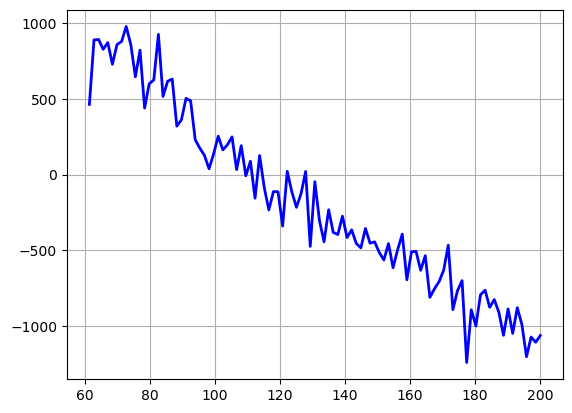

In [91]:
plt.plot(alpha_range, log_likelihood_ratio, 'b',  linewidth=2, label=r'$\mathregular{-2 \ln(\Lambda)}$', alpha=1.0)
plt.grid()
plt.show()

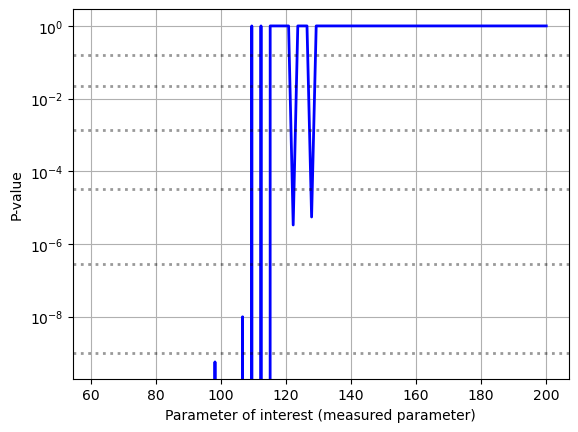

In [93]:
plt.plot(alpha_range, p_val_wilk, 'b',  linewidth=2, label=r'$\mathregular{-2 \ln(\Lambda)}$', alpha=1.0)
           
#plt.axhline(y = p_val_Z[0], color = 'black', linestyle = '--',  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[1], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[2], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[3], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[4], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[5], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
plt.axhline(y = p_val_Z[6], color = 'black', linestyle = "dotted",  linewidth = 2, alpha = 0.4) 
#plt.axhline(y = p_val_Z[7], color = 'black', linestyle = "dashed",  linewidth = 2, alpha = 0.4)

plt.yscale('log')
plt.grid()
plt.xlabel("Parameter of interest (measured parameter)")
plt.ylabel("P-value")

# plt.text(3.12, 1.5e-01, r"$1 \sigma$")
# plt.text(3.12, 2.2e-02, r"$2 \sigma$")
# plt.text(3.12, 1.3e-03, r"$3 \sigma$")
# plt.text(3.12, 3.1e-05, r"$4 \sigma$")
# plt.text(3.12, 2.8e-07, r"$5 \sigma$")
# plt.text(3.12, 9.8e-10, r"$6 \sigma$")
# #plt.text(3.12, 1.5e-01, r"$7 \sigma$")

# plt.text(1.1, 1.81e-01, "15.87%")
# plt.text(1.1, 2.80e-02, "2.28%")
# plt.text(1.1, 1.60e-03, "0.13%")
# plt.text(1.1, 3.80e-05, "0.00%")
# plt.text(1.1, 3.6e-07, "0.00%")
# plt.text(1.1, 11.96e-10, "0.00%")


#plt.savefig("./Images/P_value_Bimodal.png",  bbox_inches='tight', dpi = 400)
plt.show()

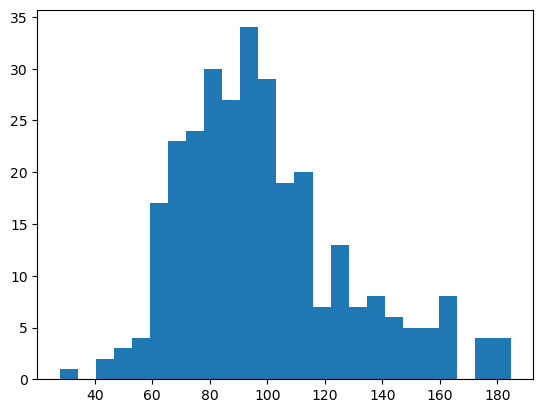

In [95]:
plt.hist(X01_a, bins = 25,  density=False)
plt.show()

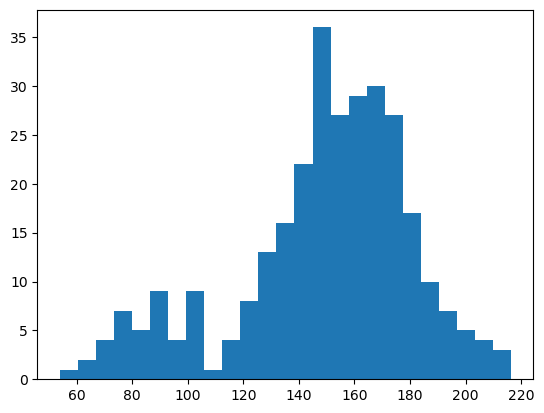

In [97]:
plt.hist(X01_b, bins = 25,  density=False)
plt.show()

In [85]:
counts_X1

array([ 1,  3,  6, 29, 42, 50, 53, 40, 16, 18, 10, 11,  8,  6,  7],
      dtype=int64)

In [13]:
counts_X2

array([ 1,  9,  9, 11, 11,  5, 15, 27, 53, 47, 52, 31, 17,  7,  5],
      dtype=int64)

In [14]:
bins_X2

array([ 53.95154857,  64.77842956,  75.60531055,  86.43219153,
        97.25907252, 108.08595351, 118.9128345 , 129.73971549,
       140.56659648, 151.39347747, 162.22035845, 173.04723944,
       183.87412043, 194.70100142, 205.52788241, 216.3547634 ])

In [15]:
N1 = np.sum(counts_X1)
N2 = np.sum(counts_X2)

In [16]:
p1 = counts_X1/N1
p2 = counts_X2/N2
p2

array([0.00333333, 0.03      , 0.03      , 0.03666667, 0.03666667,
       0.01666667, 0.05      , 0.09      , 0.17666667, 0.15666667,
       0.17333333, 0.10333333, 0.05666667, 0.02333333, 0.01666667])